# Final Project-Nataly Valenzuela Mullen 

### Research question

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import inventory data
inventory= pd.read_csv("InventoryExport_10-10-2021-0-1-38-299-org.csv")
#rename colValues title with colNames
d=np.arange(18,66,2)
k=np.arange(19,66,2)
colNames=inventory[inventory.columns[d]].iloc[0].values
colValues=inventory.columns[k]
colDict = dict(zip(colValues,colNames))
inventory.rename(columns=colDict, inplace=True)
#drop colNames
inventory.drop(columns=inventory.columns[d], inplace=True)
#rename SKU
inventory.rename(columns={"Inventory Number": "SKU"}, inplace=True)
#drop parents
inventory.dropna(subset=['UPC'], inplace=True)
inventory=inventory[inventory['Variation Parent SKU']!='Parent']
inventory.loc[(inventory.Classification =="Women's Sweaters"), 'Classification'] = "Women's Sweater"
inventory.head(5)

,Auction Title,SKU,UPC,Description,Seller Cost,Buy It Now Price,Retail Price,Picture URLs,Image Count,Relationship Name,...,FeatureBullet5,FeatureBullet6,Labels,Shopify Buy It Now,Shopify Character,Shopify Color,Shopify Size,Shopify Title,ShopifyAdditionalTags,ShopifyProductURL
1,Ugly Christmas Sweater Plus Size Women's Alway...,CW-SYE7-4520HMG2-JOLLY GRN-2XL,7.620000e+11,Item Features: <br><br>Materials: 60% Cotton/4...,15.0,24.99,60.0,ITEMIMAGEURL1=https://s3.amazonaws.com/wedgeni...,6,Size,...,Imported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",Women",http://wedgenix.myshopify.com/products/ugly-ch...
2,Ugly Christmas Sweater Plus Size Women's Alway...,CW-SYE7-4520HMG2-JOLLY GRN-L,7.620000e+11,Item Features: <br><br>Materials: 60% Cotton/4...,15.0,24.99,60.0,ITEMIMAGEURL1=https://s3.amazonaws.com/wedgeni...,6,Size,...,Imported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",Women",http://wedgenix.myshopify.com/products/ugly-ch...
3,Ugly Christmas Sweater Plus Size Women's Alway...,CW-SYE7-4520HMG2-JOLLY GRN-M,7.620000e+11,Item Features: <br><br>Materials: 60% Cotton/4...,15.0,24.99,60.0,ITEMIMAGEURL1=https://s3.amazonaws.com/wedgeni...,6,Size,...,Imported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",Women",http://wedgenix.myshopify.com/products/ugly-ch...
4,Ugly Christmas Sweater Plus Size Women's Alway...,CW-SYE7-4520HMG2-JOLLY GRN-S,7.620000e+11,Item Features: <br><br>Materials: 60% Cotton/4...,15.0,34.99,60.0,ITEMIMAGEURL1=https://s3.amazonaws.com/wedgeni...,6,Size,...,Imported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",Women",http://wedgenix.myshopify.com/products/ugly-ch...
5,Ugly Christmas Sweater Plus Size Women's Alway...,CW-SYE7-4520HMG2-JOLLY GRN-XL,7.620000e+11,Item Features: <br><br>Materials: 60% Cotton/4...,15.0,24.99,60.0,ITEMIMAGEURL1=https://s3.amazonaws.com/wedgeni...,6,Size,...,Imported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",Women",http://wedgenix.myshopify.com/products/ugly-ch...


In [3]:
inventory.shape

(2742, 42)

In [4]:
# Import sales data 2020
sales= pd.read_csv("SalesReport-12_31_2020.csv")
# Remove manual in market place this is just an internal cleanup
sales[sales['Marketplace']!='Manual']
# Sum of sales for whole year
salesSKU=sales.groupby(['SKU']).sum()
salesSKU.rename(columns={'Sold Price':'SoldPriceTotal', 'Cost of Goods':'TotalCost', 'Profit': 'TotalProfit'}, inplace=True)
salesSKU= salesSKU[['Sold Quantity', 'SoldPriceTotal', 'TotalCost', 'TotalProfit']]
# salesSKU

In [5]:
sales.shape

(21725, 21)

In [6]:
df=pd.merge(inventory, salesSKU, on='SKU')
df['AMZColor']=df['AMZColor'].str.lower()
df.loc[(df.AMZSize =="L"), 'AMZSize'] = "Large"
df.loc[(df.AMZSize =="XL"), 'AMZSize'] = "X-Large"
df.loc[(df.AMZSize =="S"), 'AMZSize'] = "Small"
df.loc[(df.AMZSize =="XS"), 'AMZSize'] = "X-Small"
# df.dtypes
print(df.isnull().sum())

Auction Title                   0
SKU                             0
UPC                             0
Description                     0
Seller Cost                     0
Buy It Now Price                0
Retail Price                    0
Picture URLs                    0
Image Count                     0
Relationship Name               0
Variation Parent SKU            0
Vary By                         0
Labels                          2
Product Tags                  571
ChannelAdvisor Store Price      0
Classification                  0
Hood                            0
Lights                          0
AMZ_Color_Map                   0
AMZColor                        0
AMZ-Color                     571
AMZDescription                  0
AMZPrice                        0
AMZSize                         0
AMZTitle                        0
ColorCASuggestion             559
Fabric Content                262
Fake Cost                     569
FeatureBullet1                 45
FeatureBullet2

In [7]:
df.dropna(thresh=400, axis='columns', inplace =True)
# # print(df[df['AMZSize'].isnull()])
print(df.isnull().sum())

Auction Title                  0
SKU                            0
UPC                            0
Description                    0
Seller Cost                    0
Buy It Now Price               0
Retail Price                   0
Picture URLs                   0
Image Count                    0
Relationship Name              0
Variation Parent SKU           0
Vary By                        0
Labels                         2
ChannelAdvisor Store Price     0
Classification                 0
Hood                           0
Lights                         0
AMZ_Color_Map                  0
AMZColor                       0
AMZDescription                 0
AMZPrice                       0
AMZSize                        0
AMZTitle                       0
FeatureBullet1                45
FeatureBullet2                45
FeatureBullet3                46
FeatureBullet4                 0
FeatureBullet5                 0
ShopifyProductURL             60
Sold Quantity                  0
SoldPriceT

In [8]:
category= pd.read_csv("2020DailyPricingReport-Final.csv")
category.columns
print(category.shape)
category=category[['Name', 'SKU','Total Units Remaining',
       'Change Price?', 'Category', 'Character', 'Color']]
category

(487, 20)


,Name,SKU,Total Units Remaining,Change Price?,Category,Character,Color
0,3D Pop Out Reindeer Surprise,SYP9-1761BWDC-BLACK-2XL,0,False,3D Pop out,Reindeer,black
1,3D Pop Out Reindeer Surprise,SYP9-1761BWDC-BLACK-L,35,True,3D Pop out,Reindeer,black
2,3D Pop Out Reindeer Surprise,SYP9-1761BWDC-BLACK-M,6,False,3D Pop out,Reindeer,black
3,3D Pop Out Reindeer Surprise,SYP9-1761BWDC-BLACK-S,4,False,3D Pop out,Reindeer,black
4,3D Pop Out Reindeer Surprise,SYP9-1761BWDC-BLACK-XL,10,False,3D Pop out,Reindeer,black
...,...,...,...,...,...,...,...
482,Yo Ho Ho Santa Sunglasses,SYP9-5061BWDC-BLACK-2XL,0,False,Comedy,Santa,black
483,Yo Ho Ho Santa Sunglasses,SYP9-5061BWDC-BLACK-L,20,True,Comedy,Santa,black
484,Yo Ho Ho Santa Sunglasses,SYP9-5061BWDC-BLACK-M,22,True,Comedy,Santa,black
485,Yo Ho Ho Santa Sunglasses,SYP9-5061BWDC-BLACK-S,37,True,Comedy,Santa,black


In [9]:
category.shape

(487, 7)

In [10]:
dirty_df=pd.merge(category, df, on='SKU')
dirty_df['Cost of Total Units Remaining']=dirty_df['Total Units Remaining']*dirty_df['Seller Cost']

In [11]:
# df.to_csv('uglyxmas.csv', index=False)

In [12]:
# df[['Color',"AMZ_Color_Map", "AMZColor"]][df['Color']!=df["AMZ_Color_Map"]]
clean_df=dirty_df.drop(columns=['UPC','Description','Retail Price',"Picture URLs", "ShopifyProductURL",
                 "Auction Title", "Relationship Name",'Variation Parent SKU', "Vary By",
                 'ChannelAdvisor Store Price', 'AMZPrice', "Labels", 'Seller Cost',
                 'AMZTitle',"AMZ_Color_Map", "AMZDescription", 'AMZColor',
                               'Total Units Remaining'])
clean_df.set_index('SKU', inplace=True)

#, 'FeatureBullet1','FeatureBullet2','FeatureBullet3','FeatureBullet4','FeatureBullet5'

In [13]:
columns=list(clean_df.columns)
for col in columns:
    print(col, ": ")
    print(clean_df[col].unique())
    print()

Name : 
['3D Pop Out Reindeer Surprise' 'B&T Abbey Road' 'Abbey Road'
 'Abominable Snowman Light Up' 'Birthday Boy' 'Blitzin'
 'Blue Reindeer Hoodie' "Women's Button Down Snowman"
 "Women's Cat Lights Light Up" 'Cat Shaming'
 'Christmas is Coming Game of Thrones' 'Christmas is Coming Light Up'
 "Women's Christmas Tree Light Up" 'Corgi'
 "Women's Cute Santa Girl Hoodie" 'DJ Jesus' "Women's Dog Couple in Love"
 'Dog Shaming' 'Dog Sweater - Gingerbread Man Light Up'
 'Dog Sweater - Puppy Love Light Up' 'Dog Sweater - Reindeer Light Up'
 "Women's Don't Want Your Balls on Me" 'Drunk Santa Snow Angel'
 'Elf Suit Hoodie' 'Elf Surprise' 'Elf V-Neck Vest'
 'Fa La La Llama w/ Jingle Bells' 'Fat Santa w/ Pop Out Beard Hoodie'
 'Feliz Navidad Pancho Claus' 'Festive Rudolph 3D Pop Out'
 'Fireplace is Lit Light Up' 'Fireplace Pullover' 'B&T Game of Thrones'
 'Gay Pride' 'Get Lit Party Reindeer' 'Giraffe Hanging Star'
 'Godzilla Light Up' 'Golfing Elf' 'Golfing Santa'
 'Golfing Santa with 3D Pop Out 

In [14]:
clean_df.drop(columns=['Hood', 'Lights']).describe()

,Buy It Now Price,Image Count,Sold Quantity,SoldPriceTotal,TotalCost,TotalProfit,Cost of Total Units Remaining
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,40.566419,6.408297,46.672489,1728.987183,641.603581,1087.383603,345.039170
std,8.207355,1.663515,68.735768,2680.110232,1011.724109,1688.013235,932.232591
min,14.990000,2.000000,1.000000,14.990000,8.500000,2.190000,0.000000
25%,34.990000,5.000000,6.000000,188.442500,81.000000,100.197500,0.000000
50%,39.990000,7.000000,21.000000,696.810000,254.640000,430.640000,109.250000
75%,49.990000,8.000000,52.500000,1854.200000,677.580000,1169.405000,349.250000
max,49.990000,9.000000,424.000000,16739.760000,6996.000000,9743.760000,15608.500000


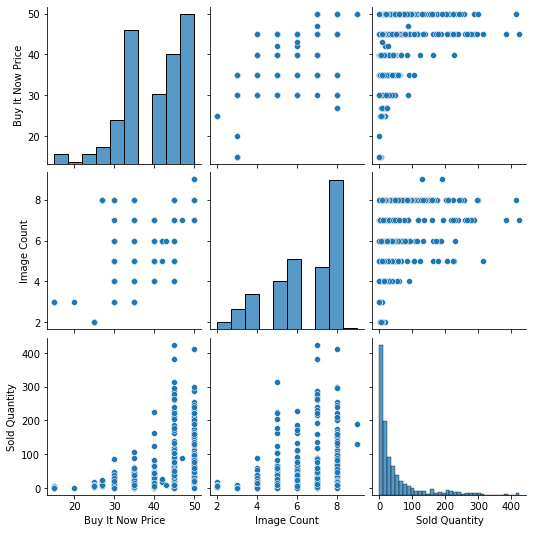

In [15]:
import seaborn as sns
g = sns.pairplot(clean_df.drop(columns=['Hood', 'Lights', "Change Price?", 'SoldPriceTotal', 'TotalCost', 'TotalProfit', 'Cost of Total Units Remaining']))

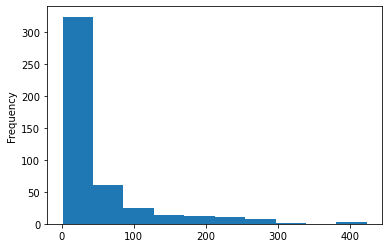

In [16]:
clean_df['Sold Quantity'].plot(kind='hist');

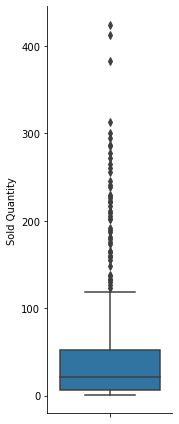

In [17]:
sns.catplot(y="Sold Quantity",kind="box", data=clean_df,  height=6, aspect=6/15 );

In [18]:
### Need to drop outliers ??????????????
print(clean_df.shape)
clean_df=clean_df[clean_df['Sold Quantity'] <200]
print(clean_df.shape)
# type(clean_df['clean_text'][0])

(458, 21)
(430, 21)


In [19]:
# Saving as csv
clean_df.to_csv('clean_df.csv', index=False)

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, SYP9-1761BWDC-BLACK-2XL to SYP9-5061BWDC-BLACK-XL
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           430 non-null    object 
 1   Change Price?                  430 non-null    bool   
 2   Category                       430 non-null    object 
 3   Character                      430 non-null    object 
 4   Color                          430 non-null    object 
 5   Buy It Now Price               430 non-null    float64
 6   Image Count                    430 non-null    int64  
 7   Classification                 430 non-null    object 
 8   Hood                           430 non-null    int64  
 9   Lights                         430 non-null    int64  
 10  AMZSize                        430 non-null    object 
 11  FeatureBullet1                 392 non-null    object 
 12  FeatureBullet2

### Data pre-processing (to the extent deemed necessary: remember the knn algorithm depends on distances, so you need to rescale, normalize or standardize your input values to make sure no variable influences the predictions due to it scale)

In [21]:
# define dataset
final_df=clean_df.copy()
final_df.drop(columns=['Name', 'FeatureBullet1', 'FeatureBullet2', 'FeatureBullet3'
                      , 'FeatureBullet4', 'FeatureBullet5',
                      'SoldPriceTotal', 'TotalCost', 'TotalProfit',
                      'Cost of Total Units Remaining'], inplace=True)
labelBinazer=LabelBinarizer()
standardScaler=StandardScaler()
minMaxScaler=MinMaxScaler()
contCol=['Buy It Now Price']
# final_df[contCol]=standardScaler.fit_transform(final_df[contCol])
final_df[contCol]=minMaxScaler.fit_transform(final_df[contCol])
cat=list(np.array(['X-Small', 'Small', 'Medium', 'Large', 'X-Large', 
                   'XX-Large', '2X Tall', '3X-Large', '4X-Large' ]).reshape(1,9))
encoder = OrdinalEncoder(categories=cat)
final_df['AMZSize'] = encoder.fit_transform(final_df['AMZSize'].to_numpy().reshape(-1, 1))
final_df['Change Price?']=labelBinazer.fit_transform(final_df['Change Price?'].to_numpy().reshape(-1, 1))

scaled_df=final_df.copy()


#LABEL ENOCDER????????????????????
labelencoder=LabelEncoder()
categoricalCol=['Category', 'Character', 'Color', 'Classification']
final_df[categoricalCol]=final_df[categoricalCol].apply(labelencoder.fit_transform)

final_df.head(2)

,Change Price?,Category,Character,Color,Buy It Now Price,Image Count,Classification,Hood,Lights,AMZSize,Sold Quantity
SKU,,,,,,,,,,,
SYP9-1761BWDC-BLACK-2XL,0,0,15,0,0.428571,6,1,0,0,5.0,10
SYP9-1761BWDC-BLACK-L,1,0,15,0,0.714286,6,1,0,0,3.0,44


In [22]:
scaled_df.to_csv('scaled_df.csv', index=False)
# define dataset
scaled_df= pd.get_dummies(scaled_df, columns=categoricalCol, drop_first=True)
scaled_df.head(2)

,Change Price?,Buy It Now Price,Image Count,Hood,Lights,AMZSize,Sold Quantity,Category_Alcohol,Category_Comedy,Category_Costume,...,Color_grey,Color_multicolor,Color_orange,Color_purple,Color_red,Color_turquoise,Color_white,Color_yellow,Classification_Men's Sweater,Classification_Women's Sweater
SKU,,,,,,,,,,,,,,,,,,,,,
SYP9-1761BWDC-BLACK-2XL,0,0.428571,6,0,0,5.0,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0
SYP9-1761BWDC-BLACK-L,1,0.714286,6,0,0,3.0,44,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting the data

In [23]:
X=scaled_df.drop(['Sold Quantity'],axis = 1)
y=scaled_df['Sold Quantity']
labels=[f'cat {i}' for i in range(len(np.arange(0,y.max()+10,5)) -1)]
yCat=pd.cut(y, bins=np.arange(0,y.max()+10,5), labels=labels)

In [24]:
X.head(1)

,Change Price?,Buy It Now Price,Image Count,Hood,Lights,AMZSize,Category_Alcohol,Category_Comedy,Category_Costume,Category_Cute,...,Color_grey,Color_multicolor,Color_orange,Color_purple,Color_red,Color_turquoise,Color_white,Color_yellow,Classification_Men's Sweater,Classification_Women's Sweater
SKU,,,,,,,,,,,,,,,,,,,,,
SYP9-1761BWDC-BLACK-2XL,0,0.428571,6,0,0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (301, 49)
X_test shape:  (129, 49)
y_train shape:  (301,)
y_test shape:  (129,)


In [26]:
X_train, X_test, yCat_train, yCat_test = train_test_split(X, yCat, test_size=0.30, random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (301, 49)
X_test shape:  (129, 49)
y_train shape:  (301,)
y_test shape:  (129,)


#### Cleaning Text

In [27]:
import re
import html
from nltk.corpus import stopwords
import string
import nltk.corpus
import nltk
import requests
from bs4 import BeautifulSoup as bsp
import ast
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer

clean_df['text']= (clean_df["Name"] +" "+ clean_df["FeatureBullet1"]+" "+ clean_df["FeatureBullet2"]
                  +" "+ clean_df["FeatureBullet3"]+" "+ clean_df["FeatureBullet4"]+" "+ clean_df["FeatureBullet5"])

clean_df.drop(columns=['Name', 'FeatureBullet1', 'FeatureBullet2', 'FeatureBullet3'
                      , 'FeatureBullet4', 'FeatureBullet5'], inplace=True)

clean_df[clean_df['text'].isnull()]
clean_df['text'].fillna('', inplace=True)

clean_df['text'][0]

'3D Pop Out Reindeer Surprise Cotton and Acrylic Rudolph Pooping Candy Design On Fabric 3D Pop Out Ball Nose On Fabric Machine Wash Only Do Not Dry Clean Imported'

In [28]:
contraction_patterns=[(r'can\'t', 'cannot'),
                      (r'he\'s', 'he is'),
                      (r'she\'s', 'she is'),
                      (r'(\w+)n’t', '\g<1> not'),
                    (r'(\w+)n\'t', '\g<1> not'),
                    (r'(\w+)’d', '\g<1> would'),
                      (r'(\w+)\'d', '\g<1> would'),
                    (r'(\w+)\'ll', '\g<1> will'),
                    (r'(\w+)\'re', '\g<1> are')]

class contraction_replacer(object):
    def __init__(self, contraction_patterns):        
        # store compiled regex object
        self._contraction_regexes = [(re.compile(p), replaced_text) for p, replaced_text in contraction_patterns]
        
    def do_contraction_normalization(self, text):
#         if type(text)!='str':
#             return text
        for contraction_regex, replaced_text in self._contraction_regexes:
            text = contraction_regex.sub(replaced_text, text)
        return text     

conReplacer = contraction_replacer(contraction_patterns)

clean_df['clean_text'] = clean_df['text'].apply(lambda x: conReplacer.do_contraction_normalization(x))

# clean_df['clean_text'].fillna('', inplace=True)
pattern = '[{}]'.format(re.escape(string.punctuation))
punc_regex = re.compile(pattern)
wn_lm= WordNetLemmatizer()
ps = PorterStemmer()
def editor(x):
    x=x.lower()
    token22=nltk.sent_tokenize(x)
    word_tokens=[nltk.word_tokenize(sent) for sent in token22]
    if len(word_tokens)==0:
        return None
    stopwords = nltk.corpus.stopwords.words('english')
    l=['v','n','a','r']
    sentence=[]
    for word in word_tokens:
        clean_sent = list(filter(None , [punc_regex.sub('', token)  for token in  word ]))
        stop_clean_sent = [wn_lm.lemmatize(w,l[0]) for w in clean_sent if w not in stopwords]
        stop_clean_sent = [wn_lm.lemmatize(w,l[1]) for w in stop_clean_sent]
        stop_clean_sent = [wn_lm.lemmatize(w,l[2]) for w in stop_clean_sent]
        stop_clean_sent = [wn_lm.lemmatize(w,l[3]) for w in stop_clean_sent]
        sentence.append(" ".join(stop_clean_sent))
    return " ".join(sentence)

clean_df['clean_text']=clean_df['clean_text'].apply(lambda x: editor(x))
clean_df['clean_text'][0]

'3d pop reindeer surprise cotton acrylic rudolph pooping candy design fabric 3d pop ball nose fabric machine wash dry clean import'

#### Multinomial NB

In [29]:
texty=clean_df[['clean_text', 'Sold Quantity']].copy()
texty.dropna(subset=['clean_text'], inplace=True)

Xnb= texty['clean_text']
ynb= texty['Sold Quantity']
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(Xnb, ynb, test_size=0.30, random_state=42)
print("X_train shape: ",Xnb_train.shape)
print("X_test shape: ",Xnb_test.shape)
print("y_train shape: ",ynb_train.shape)
print("y_test shape: ",ynb_test.shape)

X_train shape:  (273,)
X_test shape:  (118,)
y_train shape:  (273,)
y_test shape:  (118,)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=10)
X_train_tfidf=tfidf.fit_transform(Xnb_train)
X_test_tfidf=tfidf.transform(Xnb_test)

In [31]:
multiNB=MultinomialNB()
multiNB=multiNB.fit(X_train_tfidf, ynb_train)

y_train_pred=multiNB.predict(X_train_tfidf)
metrics.accuracy_score(ynb_train, y_train_pred)

0.13553113553113552

In [32]:
y_test_pred=multiNB.predict(X_test_tfidf)
metrics.accuracy_score(ynb_test, y_test_pred)

0.1016949152542373

In [33]:
# test=clean_df.copy()
# one_hot = OneHotEncoder(handle_unknown='ignore', sparse = False)
# one_hot.fit(test[categoricalCol]).transform(test[categoricalCol])